In [20]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
wfdb.dl_database('nstdb', dl_dir='mitdb_nst/')


Generating record list for: 118e00
Generating record list for: 118e06
Generating record list for: 118e12
Generating record list for: 118e18
Generating record list for: 118e24
Generating record list for: 118e_6
Generating record list for: 119e00
Generating record list for: 119e06
Generating record list for: 119e12
Generating record list for: 119e18
Generating record list for: 119e24
Generating record list for: 119e_6
Generating record list for: bw
Generating record list for: em
Generating record list for: ma
Generating list of all files for: 118e00
Generating list of all files for: 118e06
Generating list of all files for: 118e12
Generating list of all files for: 118e18
Generating list of all files for: 118e24
Generating list of all files for: 118e_6
Generating list of all files for: 119e00
Generating list of all files for: 119e06
Generating list of all files for: 119e12
Generating list of all files for: 119e18
Generating list of all files for: 119e24
Generating list of all files for: 11

In [15]:
# Load Baseline Wander (BW)
nst_path = 'mitdb_nst/'
record_bw = wfdb.rdsamp(nst_path + 'bw')
record_ma = wfdb.rdsamp(nst_path + 'ma')
record_em = wfdb.rdsamp(nst_path + 'em')

bw_signal = record_bw[0][:, 0]
ma_signal = record_ma[0][:, 0]
em_signal = record_em[0][:, 0]

In [29]:
# Normalisasi noise
def normalize(signal):
    return (signal - np.mean(signal)) / np.std(signal)

In [30]:
mitbih_beats = np.load('all_beat_segments.npy')  # Contoh dataset kamu

# Pilih satu beat untuk simulasi
beat = normalize(mitbih_beats[0])

In [18]:
np.save('nst_baseline_wander.npy', bw_signal)
np.save('nst_muscle_artifact.npy', ma_signal)
np.save('nst_electrode_motion.npy', em_signal)

In [31]:
bw_noise = np.load('nst_baseline_wander.npy')
ma_noise = np.load('nst_muscle_artifact.npy')
em_noise = np.load('nst_electrode_motion.npy')

In [32]:
# Resample noise agar panjangnya sama dengan beat MIT-BIH
def resample_noise(noise, target_length):
    return np.interp(np.linspace(0, len(noise), num=target_length), np.arange(len(noise)), noise)

# Tambahkan noise ke beat
target_length = len(beat)
bw_noise_resampled = resample_noise(bw_noise, target_length)
ma_noise_resampled = resample_noise(ma_noise, target_length)
em_noise_resampled = resample_noise(em_noise, target_length)

# Buat sinyal noisy
scale = 0.3  # Sesuaikan intensitas noise
noisy_bw = beat + scale * bw_noise_resampled
noisy_ma = beat + scale * ma_noise_resampled


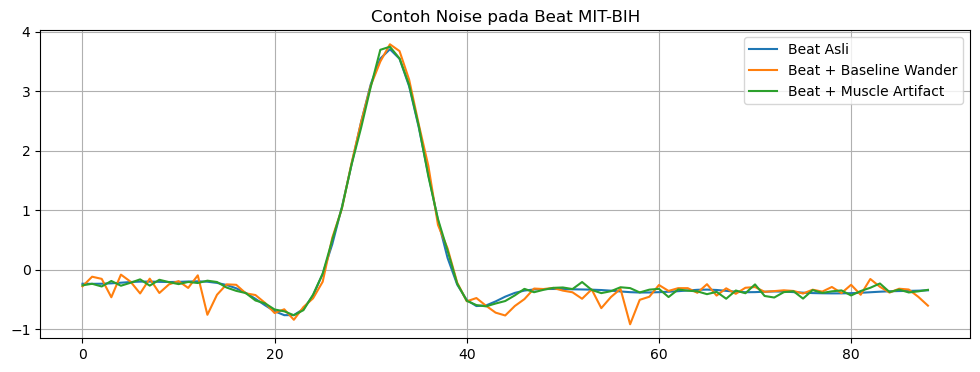

In [33]:
# Plot hasil
plt.figure(figsize=(12, 4))
plt.plot(beat, label='Beat Asli')
plt.plot(noisy_bw, label='Beat + Baseline Wander')
plt.plot(noisy_ma, label='Beat + Muscle Artifact')
plt.legend()
plt.title("Contoh Noise pada Beat MIT-BIH")
plt.grid(True)
plt.show()

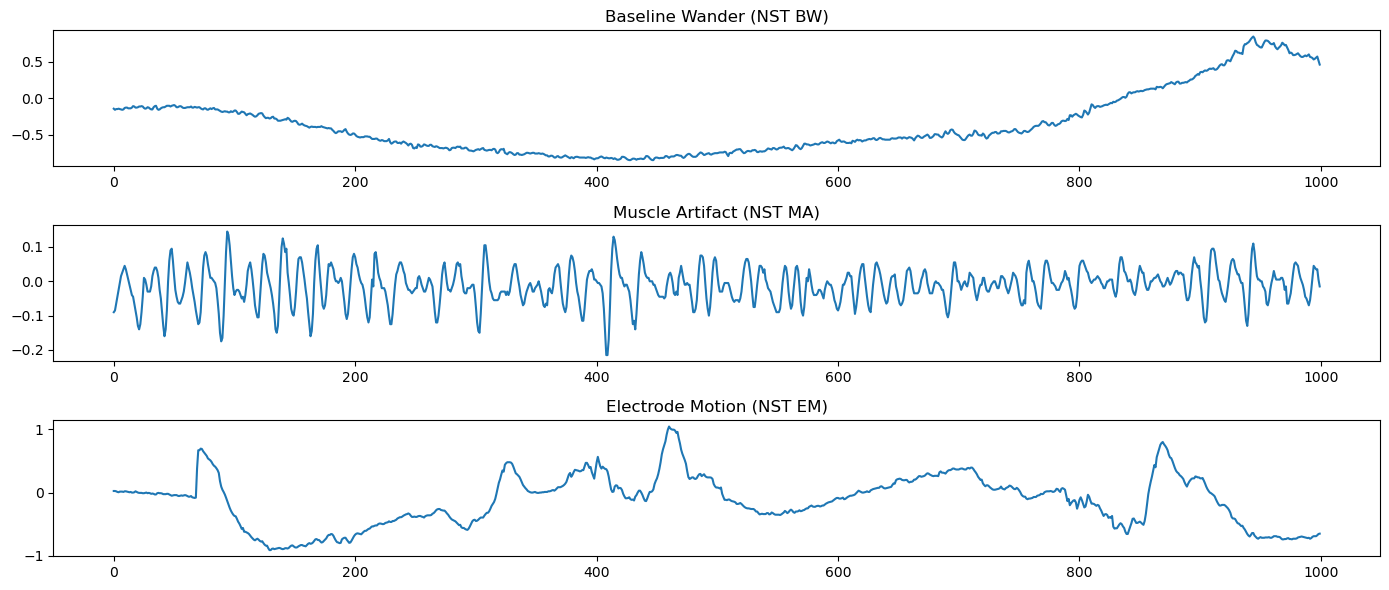

In [ ]:
# Plot contoh noise
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(bw_signal[:1000])
plt.title("Baseline Wander (NST BW)")

plt.subplot(3, 1, 2)
plt.plot(ma_signal[:1000])
plt.title("Muscle Artifact (NST MA)")

plt.subplot(3, 1, 3)
plt.plot(em_signal[:1000])
plt.title("Electrode Motion (NST EM)")

plt.tight_layout()
plt.show()